In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
type(housing)

sklearn.utils.Bunch

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
## Description of dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
print(housing.target_names)

['MedHouseVal']


## Preparing the dataset

In [9]:
df = pd.DataFrame(housing.data,columns=housing.feature_names)

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
df["Price"] = housing.target

In [12]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
## Summarize stats of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
# Checking the missing Values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

## Exploratory Data Analysis

In [16]:
## Correlation

df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [17]:
def scatter_plot(x_axis: str,y_axis: str):
    plt.scatter(df[x_axis],df[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis);

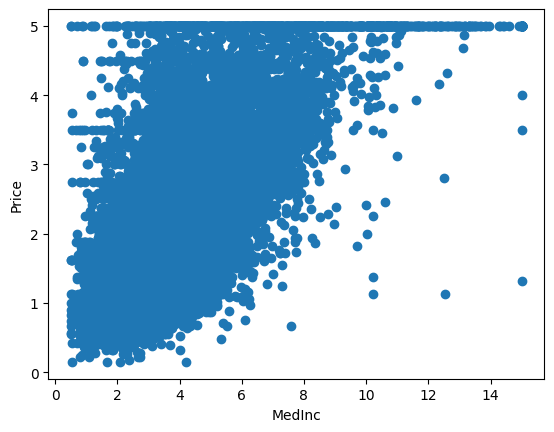

In [18]:
scatter_plot("MedInc","Price")

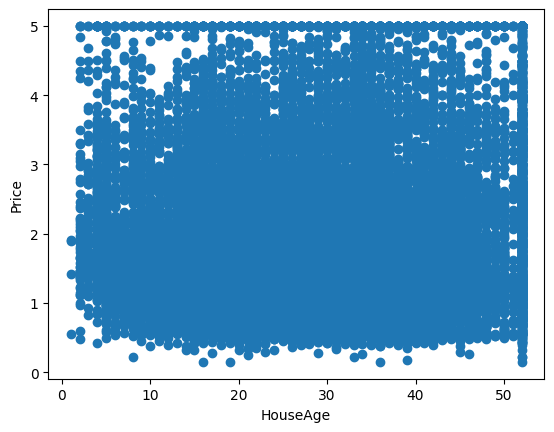

In [19]:
scatter_plot("HouseAge","Price")

<AxesSubplot:xlabel='MedInc', ylabel='Price'>

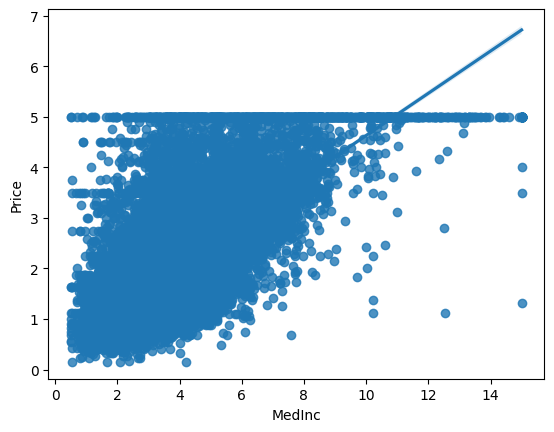

In [20]:
sns.regplot(x="MedInc",y="Price",data=df)

<AxesSubplot:xlabel='Population', ylabel='Price'>

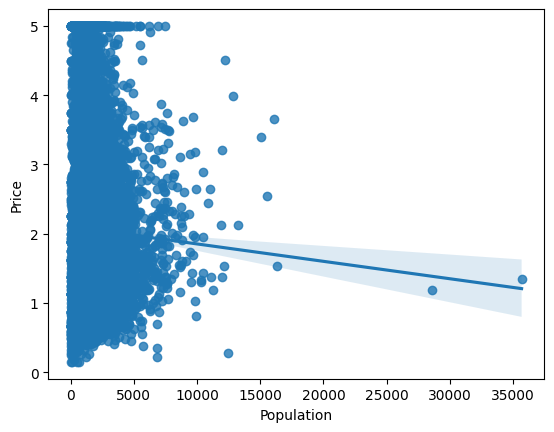

In [21]:
sns.regplot(x="Population",y="Price",data=df)

In [22]:
## Independent and dependent features

X = df.iloc[:,:-3]
y = df.iloc[:,-1]

In [23]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [24]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [25]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
8158,4.2143,37.0,5.288235,0.973529,860.0,2.529412
18368,5.3468,42.0,6.364322,1.087940,957.0,2.404523
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849
3746,6.3703,32.0,6.000000,0.990196,1159.0,2.272549
13073,2.3684,17.0,4.795858,1.035503,706.0,2.088757


In [27]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))

## Model Training

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train,y_train)

LinearRegression()

In [63]:
## print coefficients and intercept
print(model.coef_)

[ 1.03705131  0.2094345  -0.54450443  0.49574482  0.02692664 -0.05407533]


In [66]:
print(model.intercept_)

2.070348920542635


In [67]:
## On which parameters model is trained
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [73]:
### Predictions
preds = model.predict(X_test)

In [74]:
preds

array([1.004738  , 1.56329627, 2.67572005, ..., 1.72976201, 2.84522984,
       3.57385466])

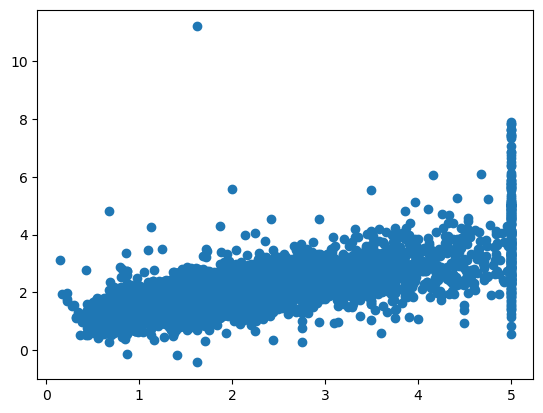

In [77]:
## plotting predictions
plt.scatter(y_test,preds)

In [78]:
# Error
residuals = y_test - preds

In [79]:
residuals

20046   -0.527738
3024    -1.105296
15663    2.324290
20484   -0.459287
9814     0.799877
           ...   
5363     1.231639
19755   -0.557940
4885    -0.552762
13043   -0.214230
8583     1.241145
Name: Price, Length: 5160, dtype: float64

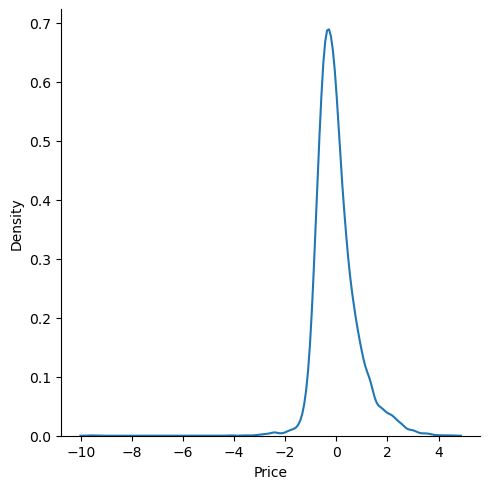

In [81]:
#plotting residuals
sns.displot(residuals,kind="kde")

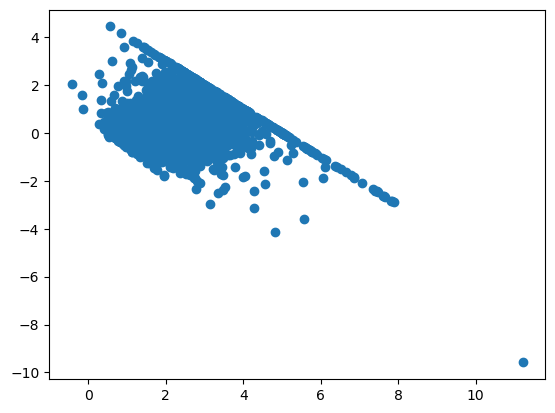

In [82]:
plt.scatter(preds,residuals)

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,preds))
print(mean_squared_error(y_test,preds))
print(np.sqrt(mean_squared_error(y_test,preds)))

0.5748783763905291
0.6287121228743704
0.7929136919453279


## R square and Adjusted R square

In [85]:
from sklearn.metrics import r2_score
score = r2_score(y_test,preds)
print(score)

0.524861305524797


## Predicting new data

In [96]:
new_data = housing.data[0][:-2].reshape(1,-1)
new_data

array([[  8.3252    ,  41.        ,   6.98412698,   1.02380952,
        322.        ,   2.55555556]])

In [97]:
scaler.transform(new_data)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.33588475,  0.98359224,  0.6394724 , -0.16653   , -0.96727898,
        -0.04609648]])

In [98]:
model.predict(scaler.transform(new_data))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.24447458])

## Pickling the model file for deployment

In [99]:
import pickle

In [102]:
pickle.dump(model,open("regmodel.pkl","wb"))

In [103]:
pickle_model = pickle.load(open("regmodel.pkl","rb"))

In [105]:
pickle_model.predict(scaler.transform(new_data))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.24447458])